# Quantum Neural Network (QNN) - Basic

In [1]:
# Impor librari
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, circuit_drawer

from sympy import symbols, sqrt, latex

from PIL import Image

# 1. Representasi fitur klasik ke keadaan kuantum & superposisi

- Gate:
  - Encoding basis Hadamard (h)
  - Rotasi arbitrer (rx, ry, rz)  
  - Pauli (x, y, z)

### Single Qubit

In [2]:
# 1 fitur klasik
x = 5

In [3]:
# Membuat QC dengan 1 qubit 
qc1 = QuantumCircuit(1)

# Rotasi X pada qubit dengan nilai fitur x sebagai sudut rotasi
qc1.h(0)

# Menjalankan QC pada simulator statevector
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc1, simulator).result()
statevector = result.get_statevector()

# Menampilkan QC
print(qc1)

# Menampilkan hasil statevector
print(statevector)

   ┌───┐
q: ┤ H ├
   └───┘
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


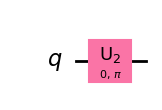

In [4]:
qc1.decompose().draw(output="mpl", fold=50)          # fold=50, maksimal blok-gate yang tampil dalam satu baris

- Hasil statevector [0.70710678+0.j, 0.70710678+0.j] menunjukkan bahwa setelah menerapkan gate Hadamard pada qubit 0 (dalam sirkuit kuantum dengan 1 qubit), qubit tersebut berada dalam superposisi merata antara keadaan ∣0⟩ dan ∣1⟩ dengan nilai amplitudo masing-masing 1/sqrt(2) atau 0.70710678.

In [5]:
# Membuat QC dengan 1 qubit 
qc2 = QuantumCircuit(1)

# Rotasi X pada qubit dengan nilai fitur x sebagai sudut rotasi
qc2.rx(x, 0)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc2, simulator).result()
statevector = result.get_statevector()
print(qc2)
print(statevector)

   ┌───────┐
q: ┤ Rx(5) ├
   └───────┘
Statevector([-0.80114362+0.j        ,  0.        -0.59847214j],
            dims=(2,))


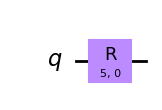

In [6]:
qc2.decompose().draw(output="mpl", fold=50)         

- Nilai fitur klasik (x1 = 5) sebagai nilai sudut (dalam radian) pada operasi rotasi (Rx) pada qubit tunggal (qubit 0) dalam sirkuit kuantum, sehingga memutar qubit 0 sebesar x1 radian sepanjang sumbu X.
- Statevector menunjukkan representasi keadaan kuantum dari qubit dengan amplitudo probabilitas (−0.80114362 + 0j) untuk keadaan dasar ∣0⟩ dan (0 − 0.59847214j) untuk keadaan dasar ∣1⟩. 

In [7]:
# Membuat QC dengan 1 qubit 
qc3 = QuantumCircuit(1)

# Gerbang Pauli-x pada qubit 
qc3.x(0)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc3, simulator).result()
statevector = result.get_statevector()
print(qc3)
print(statevector)

   ┌───┐
q: ┤ X ├
   └───┘
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


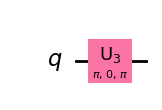

In [8]:
qc3.decompose().draw(output="mpl", fold=50)          

In [9]:
# QC dengan 1 qubit
qc4 = QuantumCircuit(1)

# Hadamard dan Rotasi X (Pauli-X) pada qubit
qc4.h(0)
qc4.rx(x, 0)                             

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc4, simulator).result()
statevector = result.get_statevector()
print(qc4)
print(statevector)

   ┌───┐┌───────┐
q: ┤ H ├┤ Rx(5) ├
   └───┘└───────┘
Statevector([-0.56649408-0.42318371j, -0.56649408-0.42318371j],
            dims=(2,))


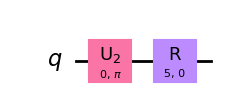

In [10]:
qc4.decompose().draw(output="mpl", fold=50)          

### Multi Qubit

In [11]:
# 2 fitur klasik
x1 = 5
x2 = 8

In [12]:
# Membuat QC dengan 2 qubit 
qc5 = QuantumCircuit(2)

# Hadamard pada qubit qi (ke 1, 2, ....., n)
qc5.h(0)
qc5.h(1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc5, simulator).result()
statevector = result.get_statevector()
print(qc5)
print(statevector)

     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


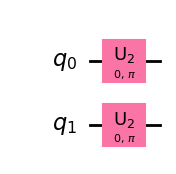

In [13]:
qc5.decompose().draw(output="mpl", fold=50)          

- Statevector [0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j] menunjukkan bahwa setelah menerapkan gate Hadamard pada dua qubit dalam sirkuit kuantum, keduanya berada dalam keadaan superposisi setara antara ∣0⟩ dan ∣1⟩ dengan keadaan kuantum ∣00⟩, ∣01⟩, ∣10⟩, ∣11⟩ dengan masing-masing amplitudo 0.5 yang sama di keempat komponen state.

In [14]:
# Membuat QC dengan 2 qubit 
qc6 = QuantumCircuit(2)

# Hadamard pada qubit qi
qc6.h(0)
qc6.h(1)

# Rotasi X pada qubit qi dengan xi
qc6.rx(x1, 0)
qc6.rx(x2, 1)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc6, simulator).result()
statevector = result.get_statevector()
print(qc6)
print(statevector)

     ┌───┐┌───────┐
q_0: ┤ H ├┤ Rx(5) ├
     ├───┤├───────┤
q_1: ┤ H ├┤ Rx(8) ├
     └───┘└───────┘
Statevector([0.48829381-0.10755999j, 0.48829381-0.10755999j,
             0.48829381-0.10755999j, 0.48829381-0.10755999j],
            dims=(2, 2))


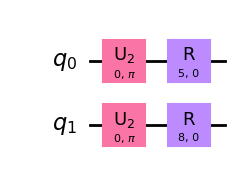

In [15]:
qc6.decompose().draw(output="mpl", fold=50)          

In [16]:
# 3 fitur klasik
x1 = 5
x2 = 8
x3 = 12

In [17]:
# Membuat QC dengan 3 qubit 
qc7 = QuantumCircuit(3)

# Hadamard pada qubit qi
qc7.h(0)
qc7.h(1)
qc7.h(2)

# Rotasi X pada qubit qi sesuai dengan xi
qc7.rx(x1, 0)
qc7.rx(x2, 1)
qc7.rx(x3, 2)

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc7, simulator).result()
statevector = result.get_statevector()
print(qc7)
print(statevector)

     ┌───┐┌───────┐ 
q_0: ┤ H ├┤ Rx(5) ├─
     ├───┤├───────┤ 
q_1: ┤ H ├┤ Rx(8) ├─
     ├───┤├───────┴┐
q_2: ┤ H ├┤ Rx(12) ├
     └───┘└────────┘
Statevector([0.35277496+0.02344833j, 0.35277496+0.02344833j,
             0.35277496+0.02344833j, 0.35277496+0.02344833j,
             0.35277496+0.02344833j, 0.35277496+0.02344833j,
             0.35277496+0.02344833j, 0.35277496+0.02344833j],
            dims=(2, 2, 2))


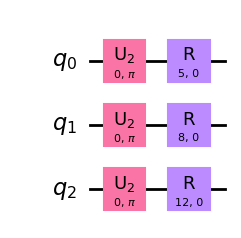

In [18]:
qc7.decompose().draw(output="mpl", fold=50)          